In [1]:
# !conda install -c conda-forge jupyter_contrib_nbextensions --y

In [2]:
# !jupyter contrib nbextension install --sys-prefix

In [3]:
# import xgboost as xgb

# # read in data
# dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
# dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# # specify parameters via map
# param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
# num_round = 2
# bst = xgb.train(param, dtrain, num_round)
# # make prediction
# preds = bst.predict(dtest)
# a.cols
# df_uk.rename(columns=new_cols)
# a.append(file_2013.rename(columns = a.columns))
# df.set_axis(['V', 'W', 'X', 'Y', 'Z'], axis=1, inplace=False)
# display(file_2010)

In [4]:
##  Procesamiento de las imagenes que vamos a usar además de su normalización

# Carga Google Drive

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importar Tensorflow

In [6]:
!pip install tensorflow-addons

In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications, optimizers
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.layers import Input, Lambda, Activation, Conv2D, MaxPooling2D, BatchNormalization, Add, concatenate, Conv2DTranspose, Flatten

2022-04-02 20:22:51.345179: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [8]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
!nvidia-smi

Found GPU at: /device:GPU:0
Fri Apr  1 14:46:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   37C    P0    N/A /  N/A |    172MiB /  4096MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

2022-04-01 14:46:22.367922: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-01 14:46:22.370097: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-01 14:46:22.444382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 14:46:22.444685: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2022-04-0

# Importador/Exportador Feature Weights

In [9]:
import json

def write_weights(feature_vector, root_path, file_name):
    with open(root_path + file_name, 'w') as outfile:
        json.dump(feature_vector, outfile)

def load_weights(root_path, file_name):
    with open(root_path + file_name) as json_file:
        data = json.load(json_file)

    return data

# Leeds Data

## Importación de datos

In [10]:
# !conda install pandas --y

In [11]:
import pandas as pd
# https://datamillnorth.org/dataset/road-traffic-accidents
# root_path = '/content/drive/Othercomputers/Mi portátil/Drive/Master UA/TFM/TFM_DATA/'

root_path = './Data/Leeds/'

file_path_2009 = './2009.csv'
file_path_2010 = './2010.csv'
file_path_2011 = './2011.csv'
file_path_2012 = './2012.csv'
file_path_2013 = './2013.csv'
file_path_2014 = './2014.csv'
file_path_2015 = './2015.csv'
file_path_2016 = './2016.csv'

file_2009 = pd.read_csv(root_path + file_path_2009, encoding = 'cp1252')
file_2010 = pd.read_csv(root_path + file_path_2010, encoding = 'cp1252')
file_2011 = pd.read_csv(root_path + file_path_2011, encoding = 'cp1252')
file_2012 = pd.read_csv(root_path + file_path_2012, encoding = 'cp1252')
file_2013 = pd.read_csv(root_path + file_path_2013, encoding = 'cp1252')
file_2014 = pd.read_csv(root_path + file_path_2014, encoding = 'cp1252')
file_2015 = pd.read_csv(root_path + file_path_2015, encoding = 'cp1252')
file_2016 = pd.read_csv(root_path + file_path_2016, encoding = 'cp1252')

###################### UNIÓN DE ARCHIVOS ######################

a = pd.concat([file_2009,file_2010])

file_2013 = clean_df = file_2013.loc[:, ~file_2013.columns.isin(['Casualty Class'])]
file_2013.set_axis(a.columns, axis=1, inplace=True)
                                             
file_2014 = clean_df = file_2014.loc[:, ~file_2014.columns.isin(['Casualty Class'])]
file_2014.set_axis(a.columns, axis=1, inplace=True)

# file_2015 = clean_df = file_2015.loc[:, ~file_2015.columns.isin(['Casualty Class'])]
file_2015.set_axis(a.columns, axis=1, inplace=True)
file_2016 = clean_df = file_2016.loc[:, ~file_2016.columns.isin(['Expr1'])]
file_2016.set_axis(a.columns, axis=1, inplace=True)

a = pd.concat([a, file_2011])
a = pd.concat([a, file_2012])
a = pd.concat([a, file_2013])
a = pd.concat([a, file_2014])
a = pd.concat([a, file_2015])
a = pd.concat([a, file_2016])

# a['1st Road Class'].value_counts()

## Limpieza de datos

In [12]:
###################### DICCIONARIOS DE REEMPLAZO ######################
# Unclassified: Carreteras locales sin destino definido. Sin embargo, los destinos locales pueden estar señalizados a lo largo de ellos.
# A, A(M) y Motorway lo mismo?
# B:            De carácter regional y utilizado para conectar zonas de menor importancia.
#               Por lo general, se muestran de color marrón o amarillo en los mapas y tienen las mismas señales blancas que las rutas de clase A que no son primarias.
#               Si la ruta es primaria, como la B6261, se mostrará igual que una ruta Clase A primaria.
#               ¿Carretera como tal?

# C:            Designaciones de autoridades locales para rutas dentro de su área con fines administrativos.
#               Estas rutas no se muestran en mapas de carreteras a pequeña escala, pero se sabe que ocasionalmente aparecen en las señales de tráfico.
road_class_replace = {
    'Motorway': 1,
    'A(M)': 2,
    'A': 3,
    'B': 4,
    'C': 5,
    'Unclassified': 6
}

##################################
accident_date_replace = {
    'Dry': 1,
    'Wet / Damp': 2,
    'Snow': 3,
    'Frost / Ice': 4,
    'Flood': 5,
}
##################################

road_surface_replace = {
    'Dry': 1,
    'Wet / Damp': 2,
    'Snow': 3,
    'Frost/ Ice': 4,
    'Frost / Ice': 4,
    'Flood': 5,
    'Flood (surface water over 3cm deep)': 5,
    '5': 5
}

# La 5: "Darkness: street lighting unknown" no está presente en el paper, le hemos puesto un 5 porque sí #
lighting_conditions_replace = {
    'Daylight: street lights present': 1,
    'Darkness: no street lighting': 2,
    'Darkness: street lights present and lit': 3,
    'Darkness: street lights present but unlit': 4,
    'Darkness: street lighting unknown': 5,
    '5': 5
}

# La 8.2: "Unknown" no está presente en el paper, le hemos puesto un 8 porque sí (Other) #
weather_conditions_replace = {
    'Fine without high winds': 1,
    'Raining without high winds': 2,
    'Snowing without high winds': 3,
    'Fine with high winds': 4,
    'Raining with high winds': 5,
    'Snowing with high winds': 6,
    'Fog or mist – if hazard': 7,
    'Other': 8,
    'Unknown': 8
}

type_of_vehicle_replace = {
    'Pedal cycle': 1,
    'M/cycle 50cc and under': 2,
    'Motorcycle over 50cc and up to 125cc': 3,
    'Motorcycle over 125cc and up to 500cc': 4,
    'Motorcycle over 500cc': 5,
    'Taxi/Private hire car': 6,
    'Car': 7,
    'Minibus (8 – 16 passenger seats)': 8,
    'Bus or coach (17 or more passenger seats)': 9,
    'Ridden horse': 10,
    'Agricultural vehicle (includes diggers etc.)': 11,
    'Tram / Light rail': 12,
    'Goods vehicle 3.5 tonnes mgw and under': 13,
    'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw': 14,
    'Goods vehicle 7.5 tonnes mgw and over': 15,
    'Mobility Scooter': 16,
    'Other Vehicle ': 17,
    'Motorcycle - Unknown CC': 18
}

casualty_class_replace = {
    'Driver': 1,
    'Driver/Rider': 1,
    'Driver or rider': 1,
    'Passenger': 2,
    'Vehicle or pillion passenger': 2,
    'Pedestrian': 3
}

sex_of_casualty_replace = {
    'Male': 1,
    'Female': 2
}

sex_of_casualty_replace = {
    'Male': 1,
    'Female': 2
}

###################### REEMPLAZOS ######################
clean_df = clean_df.dropna()

a['1st Road Class'].replace(road_class_replace, inplace = True)
# print('1st Road Class:', a['1st Road Class'].unique())

##################################
# a['Accident Date'].replace(accident_date_replace, inplace = True)
# print('Accident Date:', a['Accident Date'].unique())
##################################
a['Road Surface'].replace(road_surface_replace, inplace = True)
a.dropna(inplace = True)

a['Road Surface'] = a['Road Surface'].astype('int')
# print('Road Surface:', a['Road Surface'].unique())

a['Lighting Conditions'].replace(lighting_conditions_replace, inplace = True)
# print('Lighting Conditions:', a['Lighting Conditions'].unique())

a['Weather Conditions'].replace(weather_conditions_replace, inplace = True)
a = a[a['Weather Conditions'] != 'Darkness: street lighting unknown']
# print('Weather Conditions:', a['Weather Conditions'].unique())

a['Type of Vehicle'].replace(type_of_vehicle_replace, inplace = True)
# print('Type of Vehicle:', a['Type of Vehicle'].unique())

a['Casualty Class'].replace(casualty_class_replace, inplace = True)
# print('Casualty Class:', a['Casualty Class'].unique())

a['Sex of Casualty'].replace(sex_of_casualty_replace, inplace = True)
# print('Sex of Casualty:', a['Sex of Casualty'].unique())

a['Age of Casualty'] = a['Age of Casualty'].mask(a['Age of Casualty'] < 18, 1)
a['Age of Casualty'] = a['Age of Casualty'].mask(a['Age of Casualty'].between(18, 25), 2)
a['Age of Casualty'] = a['Age of Casualty'].mask(a['Age of Casualty'].between(25, 65), 3)
a['Age of Casualty'] = a['Age of Casualty'].mask(a['Age of Casualty'] > 65, 4)
# print('Age of Casualty:', a['Age of Casualty'].unique())

a['Time (24hr)'] = a['Time (24hr)'].mask(a['Time (24hr)'] < 600, 2)
a['Time (24hr)'] = a['Time (24hr)'].mask(a['Time (24hr)'] > 1800, 2)
a['Time (24hr)'] = a['Time (24hr)'].mask(a['Time (24hr)'].between(600, 1800), 1)
# print('Time (24hr):', a['Time (24hr)'].unique())
a.rename(columns={"Time (24hr)": "Accident Time"}, inplace = True)

###################### LIMPIEZA DE VALORES NULOS/DUPLICADOS ######################

clean_df = a.loc[:, ~a.columns.isin(['Accident Date', 'Reference Number'])]

clean_df['Weather Conditions'] = clean_df['Weather Conditions'].astype('int')
clean_df['Casualty Class']     = clean_df['Casualty Class'].astype('int')

clean_df = clean_df.drop_duplicates()
clean_df = clean_df.dropna()
clean_df = clean_df.reset_index(drop=True)

clean_df

/tmp/ipykernel_39105/2714109436.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Weather Conditions'] = clean_df['Weather Conditions'].astype('int')
/tmp/ipykernel_39105/2714109436.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Casualty Class']     = clean_df['Casualty Class'].astype('int')


,Easting,Northing,Number of Vehicles,Accident Time,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,429093,436258,1,2,6,1,3,1,3,Slight,1,3,7
1,434723,435534,1,2,6,1,3,1,1,Serious,2,2,7
2,441173,433047,1,1,6,1,3,1,3,Slight,2,1,7
3,428487,431364,1,1,3,1,3,1,3,Slight,1,1,7
4,425928,435480,2,1,6,1,1,1,1,Slight,2,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20302,423815,434248,2,2,6,2,3,1,1,Slight,1,3,3
20303,427102,427700,2,2,6,2,3,1,1,Slight,2,3,7
20304,419983,440944,2,1,3,1,3,1,1,Serious,2,3,7
20305,419983,440944,2,1,3,1,3,1,3,Slight,1,3,7


## Split de datos

In [13]:
# !conda install scikit-learn --y

In [14]:
from sklearn.model_selection import train_test_split

Y = clean_df['Casualty Severity']

train, test = train_test_split(clean_df, test_size=0.2)
X_train = train.loc[:, ~train.columns.isin(['Casualty Severity'])]
Y_train = train['Casualty Severity']

X_test = test.loc[:, ~test.columns.isin(['Casualty Severity'])]
Y_test = test['Casualty Severity']

In [15]:
# fv2gi(feature_vector)
# sorted(feature_vector.items(), key = lambda item: item[0][1])

# for item in feature_vector['Accident Features'].items():
#     print(item[1])

# feature_vector[parent_key].items()

# sorted(feature_vector['Accident Features'].items(), key = lambda item: item,
#                                reverse = True)

# print(feature_vector['Accident Features']['feature_weights'])

# fv = np.array(feature_vector['Accident Features']['feature_childs'])
# list(fv[indexes])

## Construcción Feature Vector

In [16]:
def fill_feature_vector(X_dataset,child_weights):
  # Obtenemos el set de columnas del dataset
  train_columns_set  = set(X_dataset.columns)

  for parent_feature in feature_vector.keys():
    # Obtiene el set de características hijas del padre actual
    # dict.fromleys para mantener el orden, un set desordena los valores
    feature_childs_set = dict.fromkeys(feature_vector[parent_feature]['feature_childs'])

    # Obtener el índice de las columnas del actual padre para acceder a los pesos del XGBoost
    index_feature_childs = X_dataset.columns.get_indexer(feature_childs_set)

    feature_vector[parent_feature]['feature_weights'] = list([str(child_weight) for child_weight in child_weights[index_feature_childs]])

  return feature_vector

## Métodos de construcción de imágenes

In [17]:
import numpy as np
import math
from matplotlib import pyplot as plt

def get_feature_matrix_indexes(sorted_feature_vector,matrix):  

    half_row = round((matrix.shape[0] - 1) / 2)
    half_column = round((matrix.shape[1] - 1) / 2)

    matrix_indexes = {}
    
    index = 0

    for parent_key in sorted_feature_vector:
        normalized_index = math.ceil(index/2)

        if (index % 2 != 0): # Impar
            current_row = half_row - normalized_index
        else: # Par
            current_row = half_row + normalized_index

        sorted_child_indexes = np.argsort(feature_vector[parent_key]['feature_weights'])[::-1]

        child_names   = np.array(feature_vector[parent_key]['feature_childs'])
        child_weights = np.array(feature_vector[parent_key]['feature_weights'])

        sorted_child_names   = child_names[sorted_child_indexes]
        sorted_child_weights = child_weights[sorted_child_indexes]

        position = 0
        for sorted_child_index in sorted_child_indexes:
            normalized_position = math.ceil(position/2)

            if (position % 2 != 0): # Impar
                current_column = half_column - normalized_position
            else: # Par
                current_column = half_column + normalized_position

            matrix_indexes[child_names[sorted_child_index]] = [current_row, current_column]
            position = position + 1 

        index = index + 1

    return matrix_indexes
    
def fv2gi(feature_vector):

    max_dimension = 0
    for key in feature_vector:
        childs_number = len(feature_vector[key]['feature_childs'])
        max_dimension = max(childs_number, max_dimension)
                
    matrix = np.zeros((max_dimension, max_dimension))

    weights_vector = []
    for parent_key in feature_vector:
        wpi = sum([float(child_weight) for child_weight in feature_vector[parent_key]['feature_weights']])
        feature_vector[parent_key]['wpi'] = wpi
        weights_vector.append(wpi)

   
    sorted_feature_vector = sorted(feature_vector.items(),
                                   key = lambda item: item[1]['wpi'],
                                   reverse = True)
     
    sorted_feature_vector = dict(sorted_feature_vector)

    
    matrix_indexes = get_feature_matrix_indexes(sorted_feature_vector, matrix)

    return matrix_indexes

# matrix_indexes = fv2gi(feature_vector)

## Normalización de datos

In [18]:
# !conda install -c conda-forge imbalanced-learn

In [19]:
from imblearn.over_sampling import BorderlineSMOTE

def oversample_data(X_data, Y_labels):

    oversample = BorderlineSMOTE(kind='borderline-2')
    X_oversampled, Y_oversampled = oversample.fit_resample(X_data, Y_labels)

    print('********** After OverSampling **********')
    print('Slight: ', (Y_oversampled == 'Slight').sum())
    print('Serious:', (Y_oversampled == 'Serious').sum())
    print('Fatal:  ', (Y_oversampled == 'Fatal').sum())
    print('\n Total X: ', len(X_oversampled), ' Total Y: ', len(Y_oversampled))

    return X_oversampled, Y_oversampled

X_train, Y_train = oversample_data(X_train, Y_train)

********** After OverSampling **********
Slight:  14272
Serious: 14272
Fatal:   14272

 Total X:  42816  Total Y:  42816


In [20]:
from scipy.stats import zscore
import pandas as pd

def normalize_data(X_data):

    # Create a sample df
    normalized_df = X_data

    # Calculate the zscores and drop zscores into new column
    for column in normalized_df.columns:
        normalized_df[column] = zscore(normalized_df[column])
    
    return normalized_df

X_train = normalize_data(X_train)
X_test  = normalize_data(X_test)

/tmp/ipykernel_39105/2811399924.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df[column] = zscore(normalized_df[column])


In [21]:
print('********** Before OverSampling **********')
print('Slight: ', (Y_train == 'Slight').sum())
print('Serious:', (Y_train == 'Serious').sum())
print('Fatal:  ', (Y_train == 'Fatal').sum())
print('\n Total X:', len(X_train), ' Total Y:', len(Y_train), '\n')

********** Before OverSampling **********
Slight:  14272
Serious: 14272
Fatal:   14272

 Total X: 42816  Total Y: 42816 



## Oversamplig de datos

In [22]:
from imblearn.over_sampling import BorderlineSMOTE

def oversample_data(X_data, Y_labels):

    oversample = BorderlineSMOTE(kind='borderline-2')
    X_oversampled, Y_oversampled = oversample.fit_resample(X_data, Y_labels)

    print('********** After OverSampling **********')
    print('Slight: ', (Y_oversampled == 'Slight').sum())
    print('Serious:', (Y_oversampled == 'Serious').sum())
    print('Fatal:  ', (Y_oversampled == 'Fatal').sum())
    print('\n Total X: ', len(X_oversampled), ' Total Y: ', len(Y_oversampled))
    # Y_train_labels = Y_train

    return X_oversampled, Y_oversampled

X_train, Y_train = oversample_data(X_train, Y_train)

********** After OverSampling **********
Slight:  14272
Serious: 14272
Fatal:   14272

 Total X:  42816  Total Y:  42816


## Pesos XGBoost

### Carga de pesos

In [23]:
FILE_PATH = './XGBoost_Weights/'
# FILE_NAME = 'leeds_calculated_weights.json'
FILE_NAME = 'leeds_default_weights.json'

feature_vector = load_weights(FILE_PATH, FILE_NAME)
display(feature_vector)

{'Accident Features': {'feature_childs': ['Easting',
   'Northing',
   '1st Road Class',
   'Accident Time',
   'Number of Vehicles'],
  'feature_weights': [0.165774538,
   0.171530785,
   0.082228259,
   0.047771472,
   0.060763375]},
 'Roadway Features': {'feature_childs': ['Road Surface'],
  'feature_weights': [0.048847406]},
 'Environmental Features': {'feature_childs': ['Lighting Conditions',
   'Weather Conditions'],
  'feature_weights': [0.041826936, 0.04354843]},
 'Vehicle Features': {'feature_childs': ['Type of Vehicle'],
  'feature_weights': [0.126314657]},
 'Casualty Features': {'feature_childs': ['Casualty Class',
   'Sex of Casualty',
   'Age of Casualty'],
  'feature_weights': [0.067057589, 0.049116389, 0.095220163]}}

### Cálculo

In [24]:
# from numpy import loadtxt
# from xgboost import XGBClassifier,XGBRanker
# from matplotlib import pyplot
# from xgboost import plot_importance

# X_data = pd.concat([X_train,X_test])
# Y_data = pd.concat([Y_train,Y_test])

# n_trees = 1000
# booster = 'gbtree'
# importance_type = 'weight'

# xgboost = XGBClassifier(n_estimators = n_trees,
#                         booster = booster,
#                         importance_type = importance_type)

# xgboost.fit(X_train, Y_train)

# child_weights  = np.array(xgboost.feature_importances_)
# feature_vector = fill_feature_vector(X_train, child_weights)

### Escritura

In [25]:
# FILE_PATH = './XGBoost_Weights/'
# # FILE_NAME = 'leeds_calculated_weights.json'
# # FILE_NAME = 'leeds_default_weights.json'

# write_weights(feature_vector, FILE_PATH, FILE_NAME)

### Cálculo índices de matriz

In [26]:
matrix_indexes = fv2gi(feature_vector)

In [27]:
# print(xgboost.get_booster().get_score(importance_type= 'weight'))
# plt.barh(X_train.columns, xgboost.feature_importances_)
# print(xgboost.feature_importances_)

# for column, weight in zip(X_train.columns,xgboost.feature_importances_):
#   print(column, weight)
# feature_vector

## Construcción de imágenes

In [28]:
def build_gray_images(dataset, max_dimension, matrix_indexes):

    matrix_3d = np.zeros((max_dimension, max_dimension, len(dataset.index)))
    print(len(dataset.index))
    for feature, value in matrix_indexes.items():
        matrix_3d[value[0], value[1],] = dataset[feature]
        
    return matrix_3d

train_bgi = build_gray_images(X_train, 5, matrix_indexes)
test_bgi  = build_gray_images(X_test, 5, matrix_indexes)

pd.DataFrame(train_bgi[:,:,1057])

42816
4062


,0,1,2,3,4
0,0.000000,-0.492675,-0.246551,0.000000,0.000000
1,0.000000,2.329884,1.908007,1.901259,0.000000
2,-0.910769,-0.264841,0.538053,0.031798,-0.512117
3,0.000000,0.000000,0.207076,0.000000,0.000000
4,0.000000,0.000000,-0.398340,0.000000,0.000000


## Reshape de imágenes

In [29]:
# Add one channel
# https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/

# Add one channel to gray images depending of the number of the data
def shape_images(X_data, gray_images):
  images = []

  for i in range(0,len(X_data)):
      original_matrix = gray_images[:,:,i]
      # print(original_matrix.shape)
      shaped_image = np.expand_dims(original_matrix, axis=2)
      # print(shaped_image.shape)
      images.append(shaped_image)
      # plt.matshow(shaped_image)

  return images

train_images = shape_images(X_data = X_train,
                            gray_images = train_bgi)
test_images  = shape_images(X_data = X_test,
                            gray_images = test_bgi)

<Figure size 432x288 with 0 Axes>

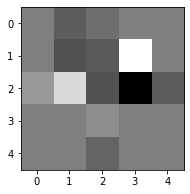

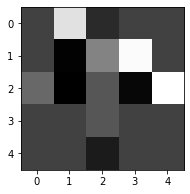

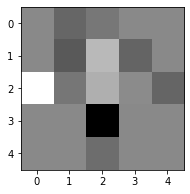

In [30]:
plt.gray()
for i in range(0,3):
    plt.figure(figsize=(3, 3))
    plt.imshow(train_bgi[:,:,i])
    plt.show()

In [31]:
# !conda install scikit-image

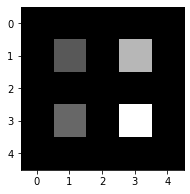

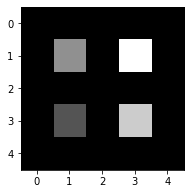

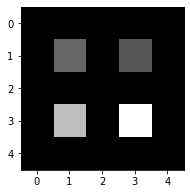

In [32]:
from skimage.feature import hog
resized_img = train_bgi[:,:,1]

for i in range(0,3):
  fd, hog_image = hog(train_bgi[:,:,i], orientations=9, pixels_per_cell=(2, 2),
                    cells_per_block=(2, 2), visualize=True)
  plt.figure(figsize=(3, 3))
  plt.imshow(hog_image)
  plt.show()

In [33]:
# input_shape = (5, 5)

array_train_images = np.asarray(train_images)
array_test_images  = np.asarray(test_images)

In [34]:
# !conda install -c conda-forge tensorflow 

In [35]:
######### EN TERMINAL #########
# !pip install tensorflow-addons

## One-Hot Encoder / Decoder

In [36]:
def casualty_to_one_hot(Y_labels):

    transf = {
        'Slight': 0,
        'Serious': 1,
        'Fatal': 2
    }

    Y_labels.replace(transf, inplace = True)

    return tf.one_hot(Y_labels, 3)

def one_hot_to_casualty(Y_labels):

    transf = {
        0: 'Slight',
        1: 'Serious',
        2: 'Fatal'
    }   

    return Y_labels.replace(transf)

Y_train_onehot = casualty_to_one_hot(Y_train)
Y_test_onehot  = casualty_to_one_hot(Y_test)

2022-04-01 14:46:27.804677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 14:46:27.804894: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2022-04-01 14:46:27.805000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 14:46:27.805183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 14:46:27.805307: I tensorflow/core/common

## Visualización de datos

In [37]:
# !conda install seaborn

### Matriz de correlación

In [38]:
# import seaborn as sns
from sklearn.decomposition import PCA

###################### CORR MATRIX ######################
def correlation_matrix(X_data):
    corrMatrix = X_data.corr()
    fig,ax  = plt.subplots(1,1,figsize=(15,10))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()

# correlation_matrix(X_test)

### PCA

In [39]:
def pca(X_train_data, X_test_data):
    pca = PCA()
    X_train_pca = pca.fit_transform(X_train_data)
    X_test_pca  = pca.transform(X_test_data)
    explained_variance = pca.explained_variance_ratio_

    figure_name = plt.figure(figsize=(15, 10))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

# pca(X_train, X_test)

### Autoencoder

#### Entrenamiento

In [40]:
input_img = Input(shape=(25,))

# definimos el encoder, que tendra una entrada de Input_img y una segunda capa con entrada de encoder1 y salida 3
encoder1 = layers.Dense(15, activation='sigmoid')(input_img)
encoder2 = layers.Dense(3, activation='sigmoid')(encoder1)

# definimos el  decoder que tendra una entrada inicial de encoder3 y una salida de 128 y finalmete una capa de salida con los mismos que Input_img
decoder1 = layers.Dense(15, activation='sigmoid')(encoder2)
decoder2 = layers.Dense(25, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = tf.keras.Model(inputs=input_img, outputs=decoder2)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #se usan estos dos en estas arquitecturas

X_train = array_train_images
X_test = array_test_images

X_train = X_train.reshape(len(array_train_images), 25)
X_test  = X_test.reshape(len(X_test), 25)

# autoencoder.fit(X_train, X_train,
#                 epochs=15,
#                 batch_size=32,
#                 shuffle=True,
#                 validation_data=(X_test, X_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 25)                400       
Total params: 898
Trainable params: 898
Non-trainable params: 0
_________________________________________________________________


#### Visualización

In [41]:
# # create encoder model
# encoder = Model(inputs=input_img, outputs=encoder2)
# encoder.summary()
# # create decoder model
# encoded_input = Input(shape=(3,))
# #lo que hace aqui es quedarse con las capas que corresponden al decodificador
# decoder_layer1 = autoencoder.layers[-2]
# decoder_layer2 = autoencoder.layers[-1]
# decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))
# decoder.summary()
# # si miramos la salida, son simetricos el uno respecto al otro
# # encoder va de input a 3 y decoder de 3 a input

# # get latent vector for visualization
# latent_vector = encoder.predict(X_test)
# # get decoder output to visualize reconstructed image
# reconstructed_imgs = decoder.predict(latent_vector)


# # visualize in 3D plot
# from pylab import rcParams
# from mpl_toolkits.mplot3d import Axes3D

# rcParams['figure.figsize'] = 10, 8

# fig = plt.figure(1)
# ax = Axes3D(fig)

# xs = latent_vector[:, 0]
# ys = latent_vector[:, 1]
# zs = latent_vector[:, 2]

# color=['red','green','blue']

# for x, y, z, label in zip(xs, ys, zs, Y_test):
#     c = color[int(label)]
#     ax.text(x, y, z, label, backgroundcolor=c)
    
# ax.set_xlim(xs.min(), xs.max())
# ax.set_ylim(ys.min(), ys.max())
# ax.set_zlim(zs.min(), zs.max())

# # plt.show()

# # X_test_encoded = encoder.predict(X_test, batch_size=32)
# # plt.figure(figsize=(6, 6))
# # plt.scatter(X_test_encoded[:, 0], X_test_encoded[:, 1], c=Y_test)
# # plt.colorbar()
# # plt.show()

### TSNE

In [42]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

def plot_TSNE(X_data, Y_data, n_components, output_file_name=None):
    X_data_scaled = StandardScaler().fit_transform(X_data)
    z_data = TSNE(n_components=n_components).fit_transform(X_data_scaled)
    # X_test_scaled = StandardScaler().fit_transform(X_test)
    # z_test = TSNE(n_components=2).fit_transform(X_test_scaled)

    palette = sns.color_palette("hls", 3)
    fig,ax  = plt.subplots(1,1,figsize=(15,10))
    sns.scatterplot(x = z_data[:,0],
                    y = z_data[:,1],
                    hue = Y_data,
                    palette = palette,
                    legend = 'full')

    if (output_file_name): plt.savefig('./Out/' + output_file_name)

# output_file_name = './2d_test_tsne.jpg'
# plot_TSNE(X_test, Y_test, n_components=2)

# output_file_name = './2d_train_tsne.jpg'
# plot_TSNE(X_train, Y_train, n_components=2)

# output_file_name = './3d_test_tsne.jpg'
# plot_TSNE(X_test, Y_test, n_components=3)

# output_file_name = './3d_train_tsne.jpg'
# plot_TSNE(X_train, Y_train, n_components=3)

## TASP-CNN

### Definición

In [43]:
import tensorflow_addons as tfa

lr_init = 0.1
num_classes = 3

tasp_cnn = models.Sequential()
tasp_cnn.add(layers.Conv2D(256, (3, 3),strides=(1, 1), activation='relu', padding='same', input_shape=(5, 5, 1)))
tasp_cnn.add(layers.BatchNormalization())
tasp_cnn.add(layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(3, 3, 256)))
tasp_cnn.add(layers.BatchNormalization())
tasp_cnn.add(layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(3, 3, 256)))
tasp_cnn.add(layers.BatchNormalization())
tasp_cnn.add(layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(3, 3, 256)))
tasp_cnn.add(layers.BatchNormalization())  
tasp_cnn.add(layers.Flatten())
tasp_cnn.add(layers.Dense(units=128))
tasp_cnn.add(layers.Dense(3, activation='softmax'))

tasp_cnn.compile(
    optimizer=Adam(learning_rate = lr_init, epsilon=1e-06),
    loss='categorical_crossentropy',
    metrics=[tfa.metrics.F1Score(num_classes = num_classes, average='micro', threshold=0.1)]
  )

/home/luis/anaconda3/envs/TFM/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


### Entrenamiento

In [44]:
input_train_shape = (len(array_train_images), 5, 5, 1)
input_test_shape = (len(array_test_images), 5, 5, 1)

array_train_images.reshape(input_train_shape)
array_test_images.reshape(input_test_shape)

# history = tasp_cnn.fit(array_train_images, Y_train_onehot,
#                     batch_size = 128, epochs = 100, shuffle = True,
#                     validation_data = (array_test_images, Y_test_onehot))

# tasp_cnn.save(root_path + 'model.h5')

# history

array([[[[ 0.        ],
         [ 1.08528537],
         [-0.30165986],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 1.93608505],
         [-0.7221983 ],
         [-0.8275132 ],
         [ 0.        ]],

        [[-1.17557965],
         [-0.05747742],
         [-0.12574651],
         [ 0.92815786],
         [ 1.51649474]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.20370719],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [-0.54290105],
         [ 0.        ],
         [ 0.        ]]],


       [[[ 0.        ],
         [-0.59925004],
         [-0.30165986],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.58574551],
         [ 1.75338778],
         [ 1.20843993],
         [ 0.        ]],

        [[-1.17557965],
         [ 0.01349351],
         [-0.20240629],
         [ 0.92815786],
         [-0.65941541]],

        [[ 0.        ]

### Carga de modelo pre-entrenado

In [45]:
# tasp_cnn = tf.keras.models.load_model(root_path + 'model.h5')

### Resultados

In [46]:
# from sklearn.metrics import classification_report

# Y_labels = one_hot_to_casualty(Y_test)

# ########################################################################

# # Plot history: F1 SCORE
# # figure_name = plt.figure(figsize=(20, 10))
# # plt.plot(history.history['f1_score'], label='F1 score (training data)')
# # plt.plot(history.history['val_f1_score'], label='F1 score (validation data)')
# # plt.title('F1 score')
# # plt.ylabel('F1 score value')
# # plt.xlabel('No. epoch')
# # plt.legend(loc="upper left")
# # plt.savefig('./conv-conv.jpg')
# # plt.show()

# # print(history)

# ########################################################################

# # evaluate the network
# print("[INFO] evaluating network...")
# predictions = tasp_cnn.predict(x=array_test_images, batch_size=128)
# print(classification_report(tf.argmax(Y_test_onehot, axis=1),
# 	                          predictions.argmax(axis=1),
#                             target_names = Y_labels.unique()))

In [47]:
# import tensorflow as tf
# from sklearn.metrics import classification_report

# predictions = xgboost.predict(X_test)
# predictions

In [48]:
# prediction_string = [str(prediction) for prediction in predictions]
# pd.DataFrame(prediction_string).value_counts()

# Madrid Data

## Importación de datos

- [Web Dataset](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

- [Web documentación](https://datos.madrid.es/FWProjects/egob/Catalogo/Seguridad/Ficheros/Estructura_DS_Accidentes_trafico_desde_2019.pdf)



In [49]:
# import pandas as pd

# root_path = '/content/drive/Othercomputers/Mi portátil/Drive/Master UA/TFM/Incidentes de Trafico/Datasets/Madrid/'

root_path = './Data/Madrid/'

file_name_2019 = '2019_Accidentalidad.csv'
file_name_2020 = '2020_Accidentalidad.csv'
file_name_2021 = '2021_Accidentalidad.csv'
file_name_2022 = '2022_Accidentalidad.csv'

file_2019 = pd.read_csv(root_path + file_name_2019, sep=';')
file_2020 = pd.read_csv(root_path + file_name_2020, sep=';')
file_2021 = pd.read_csv(root_path + file_name_2021, sep=';')
file_2022 = pd.read_csv(root_path + file_name_2022, sep=';')

# print(len(file_2019[file_2019.cod_lesividad == 4]))
# print(len(file_2020[file_2020.cod_lesividad == 4]))
# print(len(file_2021[file_2021.lesividad == '4']))
# print(len(file_2022[file_2022.lesividad == '4']))

COLUMNS_TO_REMOVE = ['cod_distrito',
                     'tipo_lesividad'
                    ]

data_frame = file_2019
data_frame = data_frame.append(file_2020)

data_frame.rename(columns={"cod_lesividad": "lesividad"}, inplace = True)
data_frame.rename(columns={"tipo_vehículo": "tipo_vehiculo"}, inplace = True)
data_frame = data_frame.drop(COLUMNS_TO_REMOVE, axis=1)

data_frame = data_frame.append(file_2021)

data_frame.dropna(subset=['lesividad'], inplace = True)
data_frame.lesividad = data_frame.lesividad.replace(' ', 14).astype(int)
data_frame = data_frame.reset_index(drop=True)

/tmp/ipykernel_39105/1006312586.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(file_2020)
/tmp/ipykernel_39105/1006312586.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(file_2021)


### Calcular Vehículos implicados

A partir del número de expediente (un mismo expediente en varias filas quiere decir que se trata del mismo accidente) se hace un `groupby` a partir de él. Como el atributo `positiva_alcohol` no tiene valores nulos en ninguna de las filas, hacemos un conteo a partir de él y se asigna a una nueva columna `positiva_alcohol_rename` que posteriormente será renombrada como `vehiculos_implicados`

In [50]:
data_frame = data_frame.join(data_frame.groupby('num_expediente')['positiva_alcohol'].count(), on='num_expediente', rsuffix='_rename')
data_frame.rename(columns={"positiva_alcohol_rename": "vehiculos_implicados"}, errors="raise", inplace=True)

## Limpieza de datos

### Clasificación de carreteras

In [51]:
######################### SIGUIENTE CELDA #########################

# Unclassified: Carreteras locales sin destino definido. Sin embargo, los destinos locales pueden estar señalizados a lo largo de ellos.
# A, A(M) y Motorway lo mismo?
# B:            De carácter regional y utilizado para conectar zonas de menor importancia.
#               Por lo general, se muestran de color marrón o amarillo en los mapas y tienen las mismas señales blancas que las rutas de clase A que no son primarias.
#               Si la ruta es primaria, como la B6261, se mostrará igual que una ruta Clase A primaria.
#               ¿Carretera como tal?

# C:            Designaciones de autoridades locales para rutas dentro de su área con fines administrativos.
#               Estas rutas no se muestran en mapas de carreteras a pequeña escala, pero se sabe que ocasionalmente aparecen en las señales de tráfico.

# Unclassified
street_regex  = ('CALL.|Calle|CALLE|c/|C/|C.|calle|'
                 'AVDA|AV|AVENIDA|AVDA|avenida|Avda.|'
                 'PASEO|paseo|'
                 'PARQUE|PQUE|'
                 'RONDA|'
                 'PUERTA|PTA|Puerta|'
                 'PNTE|PUENTE|'
                 'PLAZA|PZA|'
                 'CMNO|CAMINO|'
                 'BULE|'
                 'TRVA|'
                 'CUSTA|CUESTA|'
                 'GTA|gta|GLORIETA|glorieta|ROTONDA|'
                 'AEROPUERTO|AEROP'
)

highway_regex = 'AUTOV.|autovia|A-|M-|M 30|m 30|A\\d|M 23|M23' # A,A(M),Motorway
road_regex = 'CTRA.|CARRETERA|carretera|CRA.|CALZADA|POLIGONO' # B

street_indexes  = data_frame[data_frame.localizacion.str.contains(street_regex,  case = True, regex=True)].index
highway_indexes = data_frame[data_frame.localizacion.str.contains(highway_regex, case = True, regex=True)].index
road_indexes    = data_frame[data_frame.localizacion.str.contains(road_regex, case = True, regex=True)].index
# avenue_indexes  = data_frame[data_frame.localizacion.str.contains(avenue_regex,  case = True, regex=True)].index
# ride_indexes    = data_frame[data_frame.localizacion.str.contains(ride_regex, case = True, regex=True)].index

data_frame['tipo_via'] = 'N/A'

data_frame.iloc[street_indexes,  data_frame.columns.get_loc('tipo_via')] = 'Unclassified'
data_frame.iloc[highway_indexes, data_frame.columns.get_loc('tipo_via')] = 'A'
data_frame.iloc[road_indexes, data_frame.columns.get_loc('tipo_via')] = 'B'
# data_frame.iloc[ride_indexes, data_frame.columns.get_loc('tipo_via')] = 'AVENIDA'
# data_frame.iloc[avenue_indexes,  data_frame.columns.get_loc('tipo_via')] = 'AVENIDA'


data_frame.iloc[street_indexes,  data_frame.columns.get_loc('localizacion')] = 3
data_frame.iloc[highway_indexes, data_frame.columns.get_loc('localizacion')] = 1
data_frame.iloc[road_indexes, data_frame.columns.get_loc('localizacion')] = 2
# data_frame.iloc[avenue_indexes,  data_frame.columns.get_loc('localizacion')] = '3'
# data_frame.iloc[ride_indexes, data_frame.columns.get_loc('localizacion')] = '5'


data_frame = data_frame[~(data_frame.tipo_via == 'N/A')]
# print(data_frame.localizacion.unique())

In [52]:
weather_conditions_replace = {
    'Despejado': 1,
    'Nublado': 2,
    'Lluvia débil': 3,
    'LLuvia intensa': 4,
    'Granizando':  5,
    'Nevando': 6,
    'Se desconoce': 7 
}

### CUIDADO CON Motocicleta hasta 125cc!!! HEMOS SUPUESTO QUE LOS CICLOMOTORES SON HASTA 50CC!!
# type_of_vehicle_replace = {
#     'Bicicleta': 1,
#     'Ciclomotor': 2,
#     'Motocicleta hasta 125cc': 3,
#     'Motorcycle over 125cc and up to 500cc': 4,
#     'Motorcycle over 500cc': 5,
#     'Taxi/Private hire car': 6,
#     'Car': 7,
#     'Minibus (8 – 16 passenger seats)': 8,
#     'Bus or coach (17 or more passenger seats)': 9,
#     'Ridden horse': 10,
#     'Agricultural vehicle (includes diggers etc.)': 11,
#     'Tram / Light rail': 12,
#     'Goods vehicle 3.5 tonnes mgw and under': 13,
#     'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw': 14,
#     'Goods vehicle 7.5 tonnes mgw and over': 15,
#     'Mobility Scooter': 16,
#     'Other Vehicle ': 17,
#     'Motorcycle - Unknown CC': 18
# }

type_of_vehicle_replace = {}
for index,tipo_vehiculo in enumerate(data_frame.tipo_vehiculo.unique()):
    if not pd.isna(tipo_vehiculo): type_of_vehicle_replace[tipo_vehiculo] = index

casualty_class_replace = {
    'Driver': 1,
    'Driver/Rider': 1,
    'Driver or rider': 1,
    'Passenger': 2,
    'Vehicle or pillion passenger': 2,
    'Pedestrian': 3
}

casualty_class_replace = {
    'Conductor': 1,
    'Pasajero': 2,
    'Peatón': 3
}

### CUIDADO CON DESCONOCIDO!!! MEJOR HACER IMPUTACIÓN PARA RELLENENAR LOS DESCONOCIDOS?
sex_of_casualty_replace = {
    'Hombre': 1,
    'Mujer': 2,
    'Desconocido': 3
}

### REALMENTE ES A POSTERIORI, NO SE HASTA QUE PUNTO HAY QUE PREDECIRLO
accident_type_replace = {
    'Colisión fronto-lateral': 1,
    'Alcance': 2,
    'Colisión lateral': 3,
    'Choque contra obstáculo fijo': 4,
    'Colisión múltiple': 5,
    'Caída': 5,
    'Atropello a persona': 6,
    'Colisión frontal': 7,
    'Otro': 8,
    'Solo salida de la vía': 9,
    'Vuelco': 10,
    'Atropello a animal': 11,
    'Despeñamiento': 12
}

alcohol_replace = {
    'S': 1,
    'N': 2,
}

## https://datos.madrid.es/FWProjects/egob/Catalogo/Seguridad/Ficheros/Estructura_DS_Accidentes_trafico_desde_2019.pdf
accident_class_replace = {
    1:  'Slight',  # Atención en urgencias sin posterior ingreso. - LEVE
    2:  'Slight',  # Ingreso inferior o igual a 24 horas - LEVE
    5:  'Slight',  # Asistencia sanitaria ambulatoria con posterioridad - LEVE
    6:  'Slight',  # Asistencia sanitaria inmediata en centro de salud o mutua - LEVE
    7:  'Slight',  # Asistencia sanitaria sólo en el lugar del accidente - LEVE
    14: 'Slight',  # Sin asistencia sanitaria - LEVE O NADA
    3:  'Serious', # Ingreso superior a 24 horas. - GRAVE
    4:  'Fatal'    # Fallecido 24 horas - FALLECIDO 
}
###################### REEMPLAZOS ######################

### OJO QUE ESTAMOS REPLICANDO LA ESTRUCTURA DEL DATASET DE LEEDS
age_replace = {
    'Menor de 5 años': 1,
    'De 6 a 9 años': 1,
    'De 6  a  9 años': 1,
    'De 10 a 14 años': 1,
    'De 15 a 17 años': 1,
    'De 18 a 20 años': 2,
    'De 21 a 24 años': 2,
    'De 25 a 29 años': 3,
    'De 30 a 34 años': 3,
    'De 35 a 39 años': 3,
    'De 40 a 44 años': 3,
    'De 45 a 49 años': 3,
    'De 50 a 54 años': 3,
    'De 55 a 59 años': 3,
    'De 60 a 64 años': 3,
    'De 65 a 69 años': 4,
    'De 70 a 74 años': 4,
    'Más de 74 años': 4,
    'Desconocido': 5,
}

data_frame['estado_meteorológico'].replace(weather_conditions_replace, inplace = True)
print('Estado meteorológico: \n', data_frame['estado_meteorológico'].value_counts())

data_frame['tipo_vehiculo'].replace(type_of_vehicle_replace, inplace = True)
print('Tipo vehículo: \n', data_frame['tipo_vehiculo'].value_counts())

data_frame['tipo_persona'].replace(casualty_class_replace, inplace = True)
print('Tipo de persona: \n', data_frame['tipo_persona'].value_counts())

data_frame['sexo'].replace(sex_of_casualty_replace, inplace = True)
print('Sexo: \n', data_frame['sexo'].value_counts())

data_frame['positiva_alcohol'].replace(alcohol_replace, inplace = True)
print('Positivo Alcohol: \n', data_frame['positiva_alcohol'].value_counts())

data_frame['lesividad'].replace(accident_class_replace, inplace = True)
print('Gravedad: \n', data_frame['lesividad'].value_counts())

data_frame['rango_edad'].replace(age_replace, inplace = True)
print('Edad: \n', data_frame['rango_edad'].value_counts())

data_frame.hora = data_frame.hora.mask(pd.to_datetime(data_frame.hora) < '06:00:00', 2)
data_frame.hora = data_frame.hora.mask(pd.to_datetime(data_frame.hora) > '18:00:00', 2)
data_frame.hora = data_frame.hora.mask(pd.to_datetime(data_frame.hora).between('06:00:00', '18:00:00'), 1)
print('hora:', data_frame['hora'].value_counts())

district_replace = {}
for index,distrito in enumerate(data_frame.distrito.unique()):
  print(index)
  if not pd.isna(distrito): district_replace[distrito] = int(index)

accident_type_replace = {}
display(data_frame.tipo_accidente.value_counts())
for index,accident_type in enumerate(data_frame.tipo_accidente.unique()):
    if not pd.isna(accident_type): accident_type_replace[accident_type] = int(index)

data_frame['distrito'].replace(district_replace, inplace = True)
print('Distrito: \n', data_frame['distrito'].value_counts())

data_frame['tipo_accidente'].replace(accident_type_replace, inplace = True)
print('Tipo Accidente: \n', data_frame['tipo_accidente'].value_counts())

# Eliminamos aquellas lesividades desconocidas i.e. 77.
data_frame = data_frame[data_frame.lesividad != 77]

Estado meteorológico: 
 1.0    50782
3.0     3939
2.0     2932
7.0      915
4.0      800
6.0       81
5.0       18
Name: estado_meteorológico, dtype: int64
Tipo vehículo: 
 1.0     38186
8.0      5643
0.0      4853
6.0      3554
4.0      1897
2.0      1707
3.0      1409
5.0       964
7.0       760
16.0      501
17.0      342
27.0      198
18.0      151
9.0       128
15.0      112
13.0       72
21.0       71
12.0       49
24.0       32
14.0       26
20.0       26
28.0       13
22.0        9
31.0        9
11.0        8
26.0        8
32.0        3
30.0        2
35.0        2
29.0        2
23.0        1
19.0        1
33.0        1
34.0        1
25.0        1
Name: tipo_vehiculo, dtype: int64
Tipo de persona: 
 1.0    45898
2.0    11382
3.0     3517
Name: tipo_persona, dtype: int64
Sexo: 
 1    40267
2    20293
3      242
Name: sexo, dtype: int64
Positivo Alcohol: 
 2    59460
1     1342
Name: positiva_alcohol, dtype: int64
Gravedad: 
 Slight     59436
Serious     1278
Fatal         83
77  

Colisión fronto-lateral         17014
Alcance                         15035
Atropello a persona              6701
Colisión lateral                 6449
Caída                            6110
Colisión múltiple                4050
Choque contra obstáculo fijo     3049
Colisión frontal                 1499
Otro                              440
Vuelco                            207
Solo salida de la vía             175
Atropello a animal                 69
Despeñamiento                       4
Name: tipo_accidente, dtype: int64

Distrito: 
 4.0     5167
7.0     4426
19.0    4311
2.0     3925
12.0    3699
14.0    3412
15.0    3330
0.0     3197
20.0    3188
6.0     3181
10.0    3027
9.0     2963
1.0     2788
17.0    2697
8.0     2471
16.0    2150
11.0    1776
3.0     1647
5.0     1595
13.0     967
18.0     880
Name: distrito, dtype: int64
Tipo Accidente: 
 2     17014
4     15035
6      6701
0      6449
3      6110
8      4050
1      3049
5      1499
11      440
7       207
10      175
9        69
12        4
Name: tipo_accidente, dtype: int64


### Coordenadas UTM a números enteros

Las coordenadas UTM son coordenads que están expresadas en término de X e Y partiendo de la base de que parten desde una determinada localización. Estas coordenadas constan de una parte entera y una decimal.

En este dataset el formato que presentan estas coordenadas pueden ser de tres tipos:

- **XXX.XXX.XXX**: en este caso los seis primeros dígitos forman la parte entera y los tres útlimos la parte decimal.
- **XXXXXX,XX**: los seis primeros dígitos indican la parte entera, mientras que tras la coma aparecen dos dígitos de la parte decimal que habrá que completar añadiendo uno más.
- **XXXXXX**: indican la parte entera, sin contar con la parte decimal.

Por lo que el objetivo es estandarizar todos los formatos convirtiendo cada una de las coordenadas a un número entero, siendo necesario tratar con cada una de las casuísticas para añadir ceros a la derecha en caso de que falten para que cada una de las coordenadas tenga la misma longitud.

In [53]:
# Todos las comas a puntos

import re

s = data_frame.coordenada_x_utm.str
s_y = data_frame.coordenada_y_utm.str

# Regex que hace match para dos grupos, la parte entera y la parte decimal.
group_integer_and_float_pattern = '(?P<Integer>\d{3}\.\d{3})(?P<Float>\.\d{2,3})'
all_float_pattern   = '(?P<Number>\d{6},\d+)'
all_integer_pattern = '(?P<Number>\d{6}$)'

group_integer_and_float_pattern_y = '(?P<Integer>\d\.\d{3}\.\d{3})(?P<Float>\.\d{2,3})'
all_float_pattern_y   = '(?P<Number>\d{7},\d+)'
all_integer_pattern_y = '(?P<Number>\d{7}$)'

# Se extraen en un dataframe independiente ambas partes, la entera y la decimal
index_and_extracted_x1 = s.extract(group_integer_and_float_pattern)
index_and_extracted_x2 = s.extract(all_float_pattern)
index_and_extracted_x3 = s.extract(all_integer_pattern)

index_and_extracted_y1 = s_y.extract(group_integer_and_float_pattern_y)
index_and_extracted_y2 = s_y.extract(all_float_pattern_y)
index_and_extracted_y3 = s_y.extract(all_integer_pattern_y)

# Se seleccionan aquellas que no continenen valores nulos el Float.
# Es decir, aquellos con los que el match ha tenido éxito (los que llevan punto)
# en lugar de comas.
selected_rows_x1 = index_and_extracted_x1[~index_and_extracted_x1['Float'].isnull()]
selected_rows_x2 = index_and_extracted_x2[~index_and_extracted_x2['Number'].isnull()]
selected_rows_x3 = index_and_extracted_x3[~index_and_extracted_x3['Number'].isnull()]

selected_rows_y1 = index_and_extracted_y1[~index_and_extracted_y1['Float'].isnull()]
selected_rows_y2 = index_and_extracted_y2[~index_and_extracted_y2['Number'].isnull()]
selected_rows_y3 = index_and_extracted_y3[~index_and_extracted_y3['Number'].isnull()]

# Se cambia el string de la parte entera a un string sin puntos.
selected_rows_x1.Integer = selected_rows_x1.Integer.str.replace('.','')
selected_rows_x2.Number  = selected_rows_x2.Number.str.replace(',','.')

selected_rows_y1.Integer = selected_rows_y1.Integer.str.replace('.','')
selected_rows_y2.Number  = selected_rows_y2.Number.str.replace(',','.')

# Se crea una nueva columna en el nuevo dataframe con la unión de la parte
# entera y la parte decimal.
selected_rows_x1['processed_x_utm'] = selected_rows_x1.Integer + selected_rows_x1.Float
selected_rows_x2['processed_x_utm'] = selected_rows_x2.Number
selected_rows_x3['processed_x_utm'] = selected_rows_x3.Number

selected_rows_y1['processed_y_utm'] = selected_rows_y1.Integer + selected_rows_y1.Float
selected_rows_y2['processed_y_utm'] = selected_rows_y2.Number
selected_rows_y3['processed_y_utm'] = selected_rows_y3.Number

data_frame['processed_x_utm'] = 'N/A'
data_frame['processed_y_utm'] = 'N/A'

# Si la longitud de alguno de los números es menor a diez, hay que añadirle x 0s
# de diferencia
selected_rows_x2.processed_x_utm = selected_rows_x2.processed_x_utm.transform(lambda x: x + '0'*(10-len(x)))
selected_rows_x3.processed_x_utm = selected_rows_x3.processed_x_utm.transform(lambda x: x + '.000')

selected_rows_y2.processed_y_utm = selected_rows_y2.processed_y_utm.transform(lambda x: x + '0'*(11-len(x)))
selected_rows_y3.processed_y_utm = selected_rows_y3.processed_y_utm.transform(lambda x: x + '.000')

data_frame['processed_x_utm'][selected_rows_x1.index] = selected_rows_x1['processed_x_utm']
data_frame['processed_x_utm'][selected_rows_x2.index] = selected_rows_x2['processed_x_utm']
data_frame['processed_x_utm'][selected_rows_x3.index] = selected_rows_x3['processed_x_utm']

data_frame['processed_y_utm'][selected_rows_y1.index] = selected_rows_y1['processed_y_utm']
data_frame['processed_y_utm'][selected_rows_y2.index] = selected_rows_y2['processed_y_utm']
data_frame['processed_y_utm'][selected_rows_y3.index] = selected_rows_y3['processed_y_utm']

# Eliminamos aquellas filas que no tienen coordenadas
data_frame = data_frame[data_frame['coordenada_y_utm'] != '0.000']

# Eliminamos el punto de la parte decimal para convertirlo a entero
data_frame.processed_x_utm = data_frame.processed_x_utm.str.replace('.','')
data_frame.processed_y_utm = data_frame.processed_y_utm.str.replace('.','')

# Lo convertimos en entero
data_frame.processed_x_utm = data_frame.processed_x_utm.astype(int)
data_frame.processed_y_utm = data_frame.processed_y_utm.astype(int)

/tmp/ipykernel_39105/1802693479.py:38: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  selected_rows_x1.Integer = selected_rows_x1.Integer.str.replace('.','')
/tmp/ipykernel_39105/1802693479.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows_x1.Integer = selected_rows_x1.Integer.str.replace('.','')
/tmp/ipykernel_39105/1802693479.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

### Renombrado y eliminación de columnas

In [54]:
COLUMNS_TO_REMOVE = ['num_expediente', 'fecha', 'tipo_via', 'numero', 'positiva_droga', 'coordenada_x_utm', 'coordenada_y_utm']
data_frame = data_frame.loc[:, ~data_frame.columns.isin(COLUMNS_TO_REMOVE)]

data_frame.rename(columns={"localizacion": "tipo_carretera"}, errors="raise", inplace=True)
data_frame.rename(columns={"processed_x_utm": "coordenada_x_utm"}, errors="raise", inplace=True)
data_frame.rename(columns={"processed_y_utm": "coordenada_y_utm"}, errors="raise", inplace=True)

data_frame = data_frame.drop_duplicates()
data_frame = data_frame.dropna()
data_frame = data_frame.reset_index(drop=True)

/tmp/ipykernel_39105/207495652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.rename(columns={"localizacion": "tipo_carretera"}, errors="raise", inplace=True)
/tmp/ipykernel_39105/207495652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.rename(columns={"processed_x_utm": "coordenada_x_utm"}, errors="raise", inplace=True)
/tmp/ipykernel_39105/207495652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

## Split de datos

In [55]:
Y = data_frame['lesividad']
train, test = train_test_split(data_frame, test_size=0.2)
X_train = train.loc[:, ~train.columns.isin(['lesividad'])]
Y_train = train['lesividad']

X_test = test.loc[:, ~test.columns.isin(['lesividad'])]
Y_test = test['lesividad']

## Declarción de Feature Vectors

In [56]:
# feature_vector = {}

# feature_vector['Accident Features'] = {
#     'feature_childs': ['coordenada_x_utm', 'coordenada_y_utm', 'tipo_carretera', 'hora', 'vehiculos_implicados'],
#     'feature_weights': [0.165774538, 0.171530785, 0.082228259, 0.047771472, 0.060763375]
# } 

# feature_vector['Roadway Features'] = {
#     'feature_childs': ['tipo_accidente'], # Road Surface 
#     'feature_weights': [0.048847406]
# } 

# feature_vector['Environmental Features'] = {
#     'feature_childs': ['estado_meteorológico'],
#     'feature_weights': [0.041826936]
# } 
# feature_vector['Vehicle Features'] = {
#     'feature_childs': ['tipo_vehiculo'],
#     'feature_weights': [0.126314657]
# }

# feature_vector['Casualty Features'] = {
#     'feature_childs': ['tipo_persona', 'sexo', 'rango_edad', 'positiva_alcohol'],
#     'feature_weights': [0.067057589, 0.049116389, 0.095220163]
# } 


feature_vector = {}

feature_vector['Accident Features'] = {
    'feature_childs': ['coordenada_x_utm', 'coordenada_y_utm', 'tipo_carretera', 'hora', 'vehiculos_implicados'],
    'feature_weights': [0.165774538, 0.171530785, 0.082228259, 0.047771472, 0.060763375]
} 

feature_vector['Roadway Features'] = {
    'feature_childs': ['tipo_accidente'], # Road Surface 
    'feature_weights': [0.048847406]
} 

feature_vector['Environmental Features'] = {
    'feature_childs': ['estado_meteorológico'],
    'feature_weights': [0.041826936]
} 
feature_vector['Vehicle Features'] = {
    'feature_childs': ['tipo_vehiculo'],
    'feature_weights': [0.126314657]
}

feature_vector['Casualty Features'] = {
    'feature_childs': ['tipo_persona', 'sexo', 'rango_edad', 'positiva_alcohol'],
    'feature_weights': [0.067057589, 0.049116389, 0.095220163, 0.07]
} 


In [57]:
matrix_indexes = fv2gi(feature_vector)

## BASH Pesos XGBoost

In [58]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from matplotlib import pyplot

# # split data into X and y
# X = X_train
# y = Y_train

# # fit model no training data
# xgboost = XGBClassifier()
# xgboost.fit(X, y)

# # feature importance
# print(xgboost.feature_importances_)

# # plot
# pyplot.bar(range(len(xgboost.feature_importances_)), xgboost.feature_importances_)
# pyplot.show()

# for column, weight in zip(X_train.columns,xgboost.feature_importances_):
#   print(column, weight)

In [59]:
feature_vector = {}

feature_vector['Accident Features'] = {
    'feature_childs': ['coordenada_x_utm', 'coordenada_y_utm', 'tipo_carretera', 'hora', 'vehiculos_implicados'],
    'feature_weights': [0.043706235, 0.04066877, 0.04932402, 0.037829854,  0.037388127]
} 

feature_vector['Roadway Features'] = {
    'feature_childs': ['tipo_accidente'], # Road Surface 
    'feature_weights': [0.07036541]
} 

feature_vector['Environmental Features'] = {
    'feature_childs': ['estado_meteorológico'],
    'feature_weights': [0.04621587]
} 
feature_vector['Vehicle Features'] = {
    'feature_childs': ['tipo_vehiculo'],
    'feature_weights': [0.1835905]
}

feature_vector['Casualty Features'] = {
    'feature_childs': ['tipo_persona', 'sexo', 'rango_edad', 'positiva_alcohol'],
    'feature_weights': [0.29104254, 0.03937937, 0.054408602, 0.059951354]
} 
matrix_indexes = fv2gi(feature_vector)

## Normalización de datos

In [60]:
X_train = X_train.astype(int)
X_test  = X_test.astype(int)

X_train = normalize_data(X_train)
X_test  = normalize_data(X_test)

# print(len(X_train))
# print(len(X_test))

## Oversampling de datos

In [61]:
print('********** Before OverSampling **********')
print('Slight: ', (Y_train == 'Slight').sum())
print('Serious:', (Y_train == 'Serious').sum())
print('Fatal:  ', (Y_train == 'Fatal').sum())
print('\n Total X:', len(X_train), ' Total Y:', len(Y_train), '\n')

X_train, Y_train = oversample_data(X_train, Y_train)
# X_train.shape

********** Before OverSampling **********
Slight:  42520
Serious: 1012
Fatal:   64

 Total X: 43596  Total Y: 43596 

********** After OverSampling **********
Slight:  42520
Serious: 42519
Fatal:   42519

 Total X:  127558  Total Y:  127558


In [62]:
# fit model no training data
xgboost = XGBClassifier(n_estimators = 1000, booster = 'gbtree', importance_type='weight')
xgboost.fit(X_train, Y_train)

NameError: name 'XGBClassifier' is not defined

## Pesos XGBoost

### Carga de pesos

In [ ]:
FILE_PATH = './XGBoost_Weights/'
FILE_NAME = 'madrid_calculated_weights.json'

feature_vector = load_weights(FILE_PATH, FILE_NAME)
display(feature_vector)

### Cálculo

In [ ]:
# from numpy import loadtxt
# from xgboost import XGBClassifier,XGBRanker
# from matplotlib import pyplot
# from xgboost import plot_importance

# X_data = pd.concat([X_train,X_test])
# Y_data = pd.concat([Y_train,Y_test])

# n_trees = 1000
# booster = 'gbtree'
# importance_type = 'weight'

# xgboost = XGBClassifier(n_estimators = n_trees,
#                         booster = booster,
#                         importance_type = importance_type)

# xgboost.fit(X_train, Y_train)

# child_weights  = np.array(xgboost.feature_importances_)
# feature_vector = fill_feature_vector(X_train, child_weights)

### Escritura

In [ ]:
# FILE_PATH = './XGBoost_Weights/'
# FILE_NAME = 'madrid_calculated_weights.json'

# write_weights(feature_vector, FILE_PATH, FILE_NAME)

### Cálculo índices de matriz

In [ ]:
matrix_indexes = fv2gi(feature_vector)

## Construcción de imágenes

In [ ]:
train_bgi = build_gray_images(X_train, 5, matrix_indexes)
test_bgi  = build_gray_images(X_test, 5, matrix_indexes)

pd.DataFrame(train_bgi[:,:,1057])

## Reshape de imágenes

In [ ]:
train_images = shape_images(X_data = X_train,
                            gray_images = train_bgi)
test_images  = shape_images(X_data = X_test,
                            gray_images = test_bgi)

plt.gray()
for i in range(0,3):
    plt.figure(figsize=(3, 3))
    plt.imshow(train_bgi[:,:,i])
    plt.show()

## One-Hot Encoder / Decoder

In [ ]:
Y_train_onehot = casualty_to_one_hot(Y_train)
Y_test_onehot  = casualty_to_one_hot(Y_test)

array_train_images = np.asarray(train_images)
array_test_images  = np.asarray(test_images)

## Visualización de datos

In [ ]:
# !conda install -c anaconda seaborn --y

### Matriz de correlación

In [ ]:
# correlation_matrix(X_test)

### PCA

In [ ]:
# pca(X_train, X_test)

### Autoencoder

#### Entrenamiento

In [ ]:
input_img = Input(shape=(25,))

# definimos el encoder, que tendra una entrada de Input_img y una segunda capa con entrada de encoder1 y salida 3
encoder1 = layers.Dense(15, activation='sigmoid')(input_img)
encoder2 = layers.Dense(3, activation='sigmoid')(encoder1)

# definimos el  decoder que tendra una entrada inicial de encoder3 y una salida de 128 y finalmete una capa de salida con los mismos que Input_img
decoder1 = layers.Dense(15, activation='sigmoid')(encoder2)
decoder2 = layers.Dense(25, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = tf.keras.Model(inputs=input_img, outputs=decoder2)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #se usan estos dos en estas arquitecturas

X_train = array_train_images
X_test = array_test_images

X_train = X_train.reshape(len(array_train_images), 25)
X_test  = X_test.reshape(len(X_test), 25)

# autoencoder.fit(X_train, X_train,
#                 epochs=15,
#                 batch_size=32,
#                 shuffle=True,
#                 validation_data=(X_test, X_test))

#### Visualización

In [ ]:
# # create encoder model
# encoder = tf.keras.Model(inputs=input_img, outputs=encoder2)
# encoder.summary()
# # create decoder model
# encoded_input = Input(shape=(3,))
# #lo que hace aqui es quedarse con las capas que corresponden al decodificador
# decoder_layer1 = autoencoder.layers[-2]
# decoder_layer2 = autoencoder.layers[-1]
# decoder = tf.keras.Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))
# decoder.summary()
# # si miramos la salida, son simetricos el uno respecto al otro
# # encoder va de input a 3 y decoder de 3 a input

# # get latent vector for visualization
# latent_vector = encoder.predict(X_test)
# # get decoder output to visualize reconstructed image
# reconstructed_imgs = decoder.predict(latent_vector)


# # visualize in 3D plot
# from pylab import rcParams
# from mpl_toolkits.mplot3d import Axes3D

# rcParams['figure.figsize'] = 10, 8

# fig = plt.figure(1)
# ax = Axes3D(fig)

# xs = latent_vector[:, 0]
# ys = latent_vector[:, 1]
# zs = latent_vector[:, 2]

# # color=['red','green','blue']

# # for x, y, z, label in zip(xs, ys, zs, Y_test):
# #     c = color[int(label)]
# #     ax.text(x, y, z, label, backgroundcolor=c)
    
# # ax.set_xlim(xs.min(), xs.max())
# # ax.set_ylim(ys.min(), ys.max())
# # ax.set_zlim(zs.min(), zs.max())

# # plt.show()

# # X_test_encoded = encoder.predict(X_test, batch_size=32)
# # plt.figure(figsize=(6, 6))
# # plt.scatter(X_test_encoded[:, 0], X_test_encoded[:, 1], c=Y_test)
# # plt.colorbar()
# # plt.show()

### TSNE

## TASP-CNN

### Entrenamiento

In [ ]:
display(array_train_images.shape)
display(Y_train_onehot.shape)

display(array_test_images.shape)
display(Y_test_onehot.shape)

input_train_shape = (len(array_train_images), 5, 5, 1)
input_test_shape = (len(array_test_images), 5, 5, 1)

array_train_images.reshape(input_train_shape)
array_test_images.reshape(input_test_shape)


history = tasp_cnn.fit(array_train_images, Y_train_onehot, verbose=2,
                    batch_size = 128, epochs = 100, shuffle = True,
                    validation_data = (array_test_images, Y_test_onehot))

# model.save(root_path + 'madrid_model_calculated_100_epochs_weight.h5')

### Carga de modelo pre-entrenado

In [ ]:
# tasp_cnn = tf.keras.models.load_model(root_path + 'madrid_model_calculated_100_epochs_weight.h5')

In [ ]:
# output_file_name = './2d_test_tsne.jpg'
# plot_TSNE(X_test, Y_test, n_components=2)

# output_file_name = './2d_train_tsne.jpg'
# plot_TSNE(X_train, Y_train, n_components=2)

# output_file_name = './3d_test_tsne.jpg'
# plot_TSNE(X_test, Y_test, n_components=3)

# output_file_name = './3d_train_tsne.jpg'
# plot_TSNE(X_train, Y_train, n_components=3)

### Resultados

In [ ]:
from sklearn.metrics import classification_report

Y_labels = one_hot_to_casualty(Y_test)

########################################################################

# Plot history: F1 SCORE
figure_name = plt.figure(figsize=(20, 10))
plt.plot(history.history['f1_score'], label='F1 score (training data)')
plt.plot(history.history['val_f1_score'], label='F1 score (validation data)')
plt.title('F1 score')
plt.ylabel('F1 score value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.savefig('./conv-conv-madrid-calculated-100-epochs-weigth.jpg')
plt.show()

# print(history)

########################################################################

# evaluate the network
print("[INFO] evaluating network...")
predictions = tasp_cnn.predict(x=array_test_images, batch_size=128)
print(classification_report(tf.argmax(Y_test_onehot, axis=1),
	                        predictions.argmax(axis=1),
                            target_names = Y_labels.unique()))

In [ ]:
# tasp_cnn.save(root_path + 'madrid_model_XGBOOST_predicted.h5')

### 